In [1]:

from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

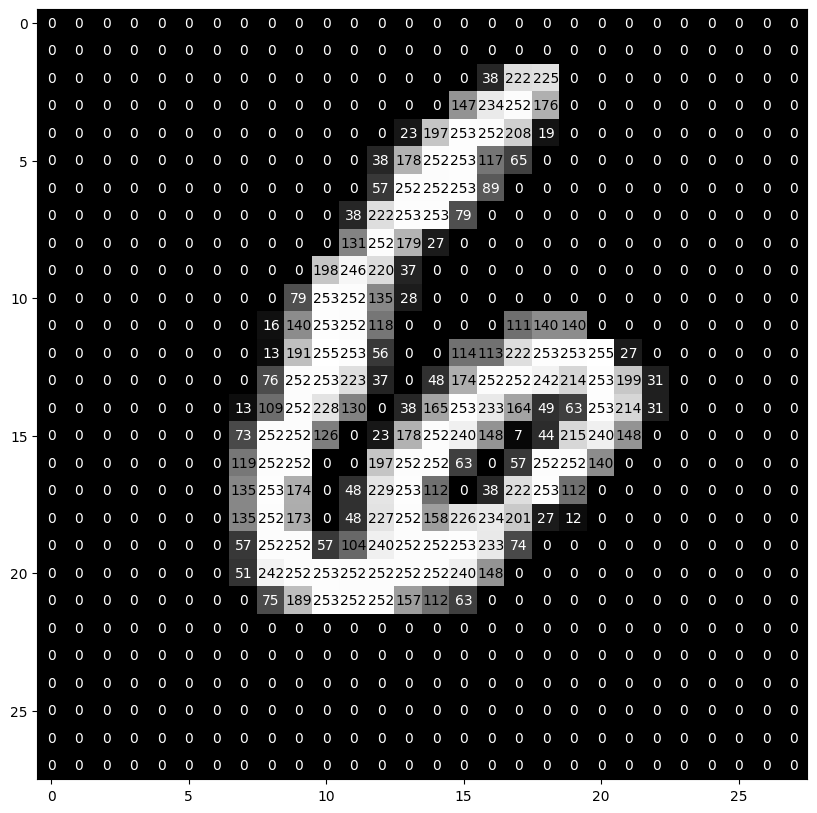

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[13], ax)
plt.show()

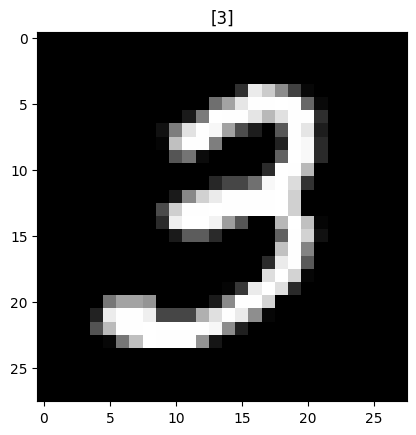

In [4]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])
plt.show()

In [5]:
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [6]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [7]:
x_train=x_train/255
x_test = x_test/255

In [8]:
def CNN_model():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(64,(5,5), input_shape = (28,28,1), activation = 'relu'))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
  
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(375, activation = 'relu'))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Dense(225, activation = 'relu'))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Dense(135, activation = 'relu'))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.Dense(10, activation = 'softmax'))

  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.01), metrics = ['accuracy'])
  return model

In [9]:
model = CNN_model()
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 256, verbose = 2)

Epoch 1/5
235/235 - 29s - loss: 0.3680 - accuracy: 0.8870 - val_loss: 0.0903 - val_accuracy: 0.9729 - 29s/epoch - 125ms/step
Epoch 2/5
235/235 - 26s - loss: 0.1579 - accuracy: 0.9585 - val_loss: 0.0705 - val_accuracy: 0.9808 - 26s/epoch - 111ms/step
Epoch 3/5
235/235 - 30s - loss: 0.1513 - accuracy: 0.9619 - val_loss: 0.0634 - val_accuracy: 0.9819 - 30s/epoch - 129ms/step
Epoch 4/5
235/235 - 29s - loss: 0.1502 - accuracy: 0.9634 - val_loss: 0.0592 - val_accuracy: 0.9863 - 29s/epoch - 124ms/step
Epoch 5/5
235/235 - 29s - loss: 0.1482 - accuracy: 0.9637 - val_loss: 0.0661 - val_accuracy: 0.9812 - 29s/epoch - 121ms/step


In [10]:
from keras.preprocessing import image
import tensorflow as tf
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [11]:

img = tf.keras.utils.load_img(path="888.png", color_mode= 'grayscale', target_size=(28, 28))
img = tf.keras.utils.img_to_array(img)
plt.imshow(tf.keras.utils.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

FileNotFoundError: [Errno 2] No such file or directory: '888.png'

In [48]:
prediction

8

In [48]:
model.save("mnist.hdf5")